In [2]:
import os
# Set the environment variable
#os.environ['STPSF_PATH'] = os.path.abspath("stpsf_data")
#os.environ['WEBBPSF_EXT_PATH'] = os.path.abspath("stpsf_data")
#os.environ['PYSYN_CDBS'] = os.path.abspath("webbpsf_ext_data/cdbs")
#os.environ['CRDS_PATH'] = os.path.abspath("crds_cache")
#os.environ['CRDS_SERVER_URL'] = "https://jwst-crds.stsci.edu"

# Verify the variable is set
print("STPSF_PATH:", os.environ['STPSF_PATH'])
print("WEBBPSF_EXT_PATH:", os.environ['WEBBPSF_EXT_PATH'])
print("PYSYN_CDBS:", os.environ['PYSYN_CDBS'])
print("CRDS_PATH:", os.environ['CRDS_PATH'])

STPSF_PATH: /home/yuchialin/JWST/stpsf_data
WEBBPSF_EXT_PATH: /home/yuchialin/JWST/stpsf_data
PYSYN_CDBS: /home/yuchialin/JWST/webbpsf_ext_data/cdbs
CRDS_PATH: /home/yuchialin/JWST/crds_cache


In [3]:
import os
import numpy as np
import subprocess

import spaceKLIP

import matplotlib
matplotlib.rcParams.update({'font.size': 14})
%matplotlib inline

import webbpsf_ext
webbpsf_ext.setup_logging('WARN', verbose=False)

In [4]:
data_root = 'data_nircam_twhya'

In [5]:
# Name the root directory where we will keep the data for this tutorial.
filt = 'F200W'  # Set to None to disable filter selection and load all filters.

In [6]:
# Initialize spaceKLIP database.
database = spaceKLIP.database.create_database(
                                    input_dir=os.path.join(data_root, 'uncal'),
                                    output_dir=data_root,
                                    filt=filt,
                                    pid=None)

2025-07-28 06:09:29,777 - CRDS - INFO -  Calibration SW Found: jwst 1.17.1 (/home/yuchialin/miniconda3/envs/spaceklip/lib/python3.11/site-packages/jwst-1.17.1.dist-info)


[spaceKLIP.database:INFO] --> Identified 1 concatenation(s)
[spaceKLIP.database:INFO]   --> Concatenation 1: JWST_NIRCAM_NRCA2_F200W_MASKRND_MASK335R_SUB320A335R
TYPE  EXP_TYPE DATAMODL TELESCOP ... PIXAR_SR BUNIT      ROLL_REF      BLURFWHM
---- --------- -------- -------- ... -------- ----- ------------------ --------
 SCI NRC_CORON   STAGE0     JWST ...      nan    DN  332.1522046605373      nan
 SCI NRC_CORON   STAGE0     JWST ...      nan    DN  342.1516318594371      nan
 REF NRC_CORON   STAGE0     JWST ...      nan    DN 184.36408829074935      nan
 REF NRC_CORON   STAGE0     JWST ...      nan    DN  184.3640873094966      nan
 REF NRC_CORON   STAGE0     JWST ...      nan    DN 184.36409185067197      nan
 REF NRC_CORON   STAGE0     JWST ...      nan    DN 184.36409776225238      nan
 REF NRC_CORON   STAGE0     JWST ...      nan    DN 184.36409239603776      nan
 REF NRC_CORON   STAGE0     JWST ...      nan    DN  184.3640893466079      nan
 REF NRC_CORON   STAGE0     JWST ...  

In [7]:
database.summarize()

NIRCAM_F200W_MASK335R
	STAGE0: 278 files;	2 SCI, 276 REF


In [9]:
# COMPREHENSIVE SUMMARY OF REFERENCE IMAGES AND STARS
print("="*60)
print("REFERENCE IMAGES AND STARS ANALYSIS")
print("="*60)

# Get the data
concat_key = 'JWST_NIRCAM_NRCA2_F200W_MASKRND_MASK335R_SUB320A335R'
table = database.obs[concat_key]
df = table.to_pandas()

# Basic counts
total_ref = len(df[df['TYPE'] == 'REF'])
total_sci = len(df[df['TYPE'] == 'SCI'])

print(f"TOTAL IMAGES:")
print(f"  • Reference images: {total_ref}")
print(f"  • Science images: {total_sci}")
print(f"  • Total: {total_ref + total_sci}")
print()

# Reference star analysis
ref_df = df[df['TYPE'] == 'REF']
ref_star_counts = ref_df['TARGPROP'].value_counts()

print(f"REFERENCE STARS:")
print(f"  • Number of different reference stars: {len(ref_star_counts)}")
print(f"  • Reference star breakdown:")
for i, (star, count) in enumerate(ref_star_counts.items(), 1):
    percentage = (count/total_ref)*100
    print(f"    {i}. {star}: {count} images ({percentage:.1f}%)")
print()

# Science target
sci_df = df[df['TYPE'] == 'SCI']
sci_targets = sci_df['TARGPROP'].unique()
print(f"SCIENCE TARGET:")
print(f"  • Target name: {sci_targets[0]}")
print(f"  • Number of science images: {total_sci}")
print()

# Observation setup
print(f"OBSERVATION DETAILS:")
print(f"  • Filter: {df['FILTER'].iloc[0]}")
print(f"  • Coronagraph mask: {df['CORONMSK'].iloc[0]}")
print(f"  • Pupil mask: {df['PUPIL'].iloc[0]}")
print(f"  • Detector: {df['DETECTOR'].iloc[0]}")
print(f"  • Subarray: {df['SUBARRAY'].iloc[0]}")
print()

# Program IDs (from filenames)
ref_program_ids = set()
sci_program_ids = set()

for filename in ref_df['FITSFILE']:
    # Extract program ID from filename (format: jw[PROGRAM_ID]...)
    program_id = filename.split('/')[-1].split('_')[0][2:7]  # Remove 'jw' prefix
    ref_program_ids.add(program_id)

for filename in sci_df['FITSFILE']:
    program_id = filename.split('/')[-1].split('_')[0][2:7]
    sci_program_ids.add(program_id)

print(f"PROGRAM IDs:")
print(f"  • Reference observations from program(s): {', '.join(sorted(ref_program_ids))}")
print(f"  • Science observations from program(s): {', '.join(sorted(sci_program_ids))}")

print("="*60)

REFERENCE IMAGES AND STARS ANALYSIS
TOTAL IMAGES:
  • Reference images: 276
  • Science images: 2
  • Total: 278

REFERENCE STARS:
  • Number of different reference stars: 27
  • Reference star breakdown:
    1. HD_33093: 36 images (13.0%)
    2. P330-E-OFFSET: 30 images (10.9%)
    3. V-AP-COL: 18 images (6.5%)
    4. -ups-Peg: 18 images (6.5%)
    5. REF-CD-23-9765: 14 images (5.1%)
    6. HD-35600: 10 images (3.6%)
    7. HD114642: 10 images (3.6%)
    8. HD25945: 9 images (3.3%)
    9. REF-HD-101581: 9 images (3.3%)
    10. REF-HD-89063: 9 images (3.3%)
    11. HD-144002: 9 images (3.3%)
    12. UCAC4_267-178509: 9 images (3.3%)
    13. REF-IRAS-13041-5653: 9 images (3.3%)
    14. REF-IRAS-09432-4847: 9 images (3.3%)
    15. REF-Y-Crt: 9 images (3.3%)
    16. HD28343-F444W: 9 images (3.3%)
    17. REF-I-VEL: 9 images (3.3%)
    18. HD-150178: 5 images (1.8%)
    19. HD-153135: 5 images (1.8%)
    20. HD190580: 5 images (1.8%)
    21. HD92921: 5 images (1.8%)
    22. HD-37501: 5 ima

In [8]:
spaceKLIP.coron1pipeline.run_obs(database=database,
                       steps={'group_scale': {'skip': False},
                              'dq_init': {'skip': False},
                              'saturation': {'n_pix_grow_sat': 1,
                                             'grow_diagonal': False},
                              'ipc': {'skip': True},
                              'superbias':{'skip': False},
                              'refpix': {'odd_even_columns': True,
                                         'odd_even_rows': True,
                                         'nlower': 4,
                                         'nupper': 4,
                                         'nleft': 4,
                                         'nright': 4,
                                         'nrow_off': 0,
                                         'ncol_off': 0},
                              'linearity': {'skip': False},
                              'dark_current': {'skip': True},
                              'persistence': {'skip': True},
                              'jump': {'rejection_threshold': 4.,
                                       'three_group_rejection_threshold': 4.,
                                       'four_group_rejection_threshold': 4.,
                                       'maximum_cores': 'all'},
                              'subtract_1overf': {'model_type': 'savgol',
                                                  'sat_frac': 0.5,
                                                  'combine_ints': True,
                                                  'vertical_corr': True,
                                                  'nproc': 4},
                              'ramp_fit': {'save_calibrated_ramp': False,
                                          'maximum_cores': 'all'},
                              'gain_scale': {'skip': False}},
                       subdir='stage1')

[spaceKLIP.coron1pipeline:INFO] --> Concatenation JWST_NIRCAM_NRCA2_F200W_MASKRND_MASK335R_SUB320A335R
[spaceKLIP.coron1pipeline:INFO]   --> Coron1Pipeline: processing jw01179005001_03107_00001_nrca2_uncal.fits
[spaceKLIP.coron1pipeline:INFO]   --> Coron1Pipeline: processing jw01179008001_03107_00001_nrca2_uncal.fits
[spaceKLIP.coron1pipeline:INFO]   --> Coron1Pipeline: processing jw03337003001_05101_00001_nrca2_uncal.fits
[spaceKLIP.coron1pipeline:INFO]   --> Coron1Pipeline: processing jw03337003001_05101_00002_nrca2_uncal.fits
[spaceKLIP.coron1pipeline:INFO]   --> Coron1Pipeline: processing jw03337003001_05101_00003_nrca2_uncal.fits
[spaceKLIP.coron1pipeline:INFO]   --> Coron1Pipeline: processing jw03337003001_05101_00004_nrca2_uncal.fits
[spaceKLIP.coron1pipeline:INFO]   --> Coron1Pipeline: processing jw03337003001_05101_00005_nrca2_uncal.fits
[spaceKLIP.coron1pipeline:INFO]   --> Coron1Pipeline: processing jw03337003001_05101_00006_nrca2_uncal.fits
[spaceKLIP.coron1pipeline:INFO]  

In [9]:
database.summarize()

NIRCAM_F200W_MASK335R
	STAGE1: 278 files;	2 SCI, 276 REF


In [10]:
import spaceKLIP.__init__
print(spaceKLIP.__init__.__version__)

2.1.1.dev111+g6e5b1f9


In [1]:
spaceKLIP.plotting.display_coron_dataset(
    database,
    restrict_to={
        'FILTER': filt,  # Sort by filter.
        'TYPE': ['SCI']  # Sort by file type SCI/REF.
    },
    interactive=True,  # Static or interactive plots?
    zoom_center=3,  # Optional zoom factor; set to None to disable.
    vmin=0, vmax=1e3,  # Define the min/max values for consistent image scaling.
    save_filename='twhya_f200W_stage1.pdf'  # Save plots to PDF.
)

NameError: name 'spaceKLIP' is not defined

In [12]:
database = spaceKLIP.database.create_database(
                                    input_dir=os.path.join(data_root, 'stage1'),
                                    file_type='rateints.fits',
                                    output_dir=data_root,
                                    filt=filt,
                                    pid=None)

[spaceKLIP.database:INFO] --> Identified 1 concatenation(s)
[spaceKLIP.database:INFO]   --> Concatenation 1: JWST_NIRCAM_NRCA2_F200W_MASKRND_MASK335R_SUB320A335R
TYPE  EXP_TYPE DATAMODL TELESCOP ... PIXAR_SR BUNIT      ROLL_REF      BLURFWHM
---- --------- -------- -------- ... -------- ----- ------------------ --------
 SCI NRC_CORON   STAGE1     JWST ...      nan  DN/s  332.1522046605373      nan
 SCI NRC_CORON   STAGE1     JWST ...      nan  DN/s  342.1516318594371      nan
 REF NRC_CORON   STAGE1     JWST ...      nan  DN/s 184.36408829074935      nan
 REF NRC_CORON   STAGE1     JWST ...      nan  DN/s  184.3640873094966      nan
 REF NRC_CORON   STAGE1     JWST ...      nan  DN/s 184.36409185067197      nan
 REF NRC_CORON   STAGE1     JWST ...      nan  DN/s 184.36409776225238      nan
 REF NRC_CORON   STAGE1     JWST ...      nan  DN/s 184.36409239603776      nan
 REF NRC_CORON   STAGE1     JWST ...      nan  DN/s  184.3640893466079      nan
 REF NRC_CORON   STAGE1     JWST ...  

In [13]:
spaceKLIP.coron2pipeline.run_obs(database=database,
                                steps={'bkg_subtract': {'skip': False},
                                       'assign_wcs': {'skip': False},
                                       'flat_field': {'skip': False},
                                       'photom': {'skip': False},
                                       'outlier_detection': {'skip': False}},
                                subdir='stage2')

[spaceKLIP.coron2pipeline:INFO] --> Concatenation JWST_NIRCAM_NRCA2_F200W_MASKRND_MASK335R_SUB320A335R
[spaceKLIP.coron2pipeline:INFO]   --> Coron2Pipeline: processing jw01179005001_03107_00001_nrca2_rateints.fits
[spaceKLIP.coron2pipeline:INFO]   --> Coron2Pipeline: processing jw01179008001_03107_00001_nrca2_rateints.fits
[spaceKLIP.coron2pipeline:INFO]   --> Coron2Pipeline: processing jw03337003001_05101_00001_nrca2_rateints.fits
[spaceKLIP.coron2pipeline:INFO]   --> Coron2Pipeline: processing jw03337003001_05101_00002_nrca2_rateints.fits
[spaceKLIP.coron2pipeline:INFO]   --> Coron2Pipeline: processing jw03337003001_05101_00003_nrca2_rateints.fits
[spaceKLIP.coron2pipeline:INFO]   --> Coron2Pipeline: processing jw03337003001_05101_00004_nrca2_rateints.fits
[spaceKLIP.coron2pipeline:INFO]   --> Coron2Pipeline: processing jw03337003001_05101_00005_nrca2_rateints.fits
[spaceKLIP.coron2pipeline:INFO]   --> Coron2Pipeline: processing jw03337003001_05101_00006_nrca2_rateints.fits
[spaceKLI

In [14]:
database.summarize()

NIRCAM_F200W_MASK335R
	STAGE2: 278 files;	2 SCI, 276 REF


In [15]:
spaceKLIP.plotting.display_coron_dataset(
    database,
    restrict_to={
        'FILTER': filt,  # Sort by filter.
        'TYPE': ['SCI']  # Sort by file type SCI/REF.
    },
    interactive=True,  # Static or interactive plots?
    zoom_center=3,  # Optional zoom factor; set to None to disable.
    vmin=0, vmax=1e3,  # Define the min/max values for consistent image scaling.
    save_filename='twhya_f200W_stage2.pdf'  # Save plots to PDF.
)

IntSlider(value=0, description='Image  Index:', max=1)

Output()

In [16]:
database = spaceKLIP.database.create_database(
                                    input_dir=os.path.join(data_root, 'stage2'),
                                    file_type='calints.fits',
                                    output_dir=data_root,
                                    filt=filt,
                                    pid=None)

[spaceKLIP.database:INFO] --> Identified 1 concatenation(s)
[spaceKLIP.database:INFO]   --> Concatenation 1: JWST_NIRCAM_NRCA2_F200W_MASKRND_MASK335R_SUB320A335R
TYPE  EXP_TYPE DATAMODL TELESCOP ... BUNIT       ROLL_REF      BLURFWHM
---- --------- -------- -------- ... ------ ------------------ --------
 SCI NRC_CORON   STAGE2     JWST ... MJy/sr  332.1522046605373      nan
 SCI NRC_CORON   STAGE2     JWST ... MJy/sr  342.1516318594371      nan
 REF NRC_CORON   STAGE2     JWST ... MJy/sr 184.36408829074935      nan
 REF NRC_CORON   STAGE2     JWST ... MJy/sr  184.3640873094966      nan
 REF NRC_CORON   STAGE2     JWST ... MJy/sr 184.36409185067197      nan
 REF NRC_CORON   STAGE2     JWST ... MJy/sr 184.36409776225238      nan
 REF NRC_CORON   STAGE2     JWST ... MJy/sr 184.36409239603776      nan
 REF NRC_CORON   STAGE2     JWST ... MJy/sr  184.3640893466079      nan
 REF NRC_CORON   STAGE2     JWST ... MJy/sr 184.36408352397774      nan
 REF NRC_CORON   STAGE2     JWST ... MJy/sr 18

In [17]:
# Initialize spaceKLIP image manipulation tools class.
imageTools = spaceKLIP.imagetools.ImageTools(database=database)


In [18]:
# Median-subtract each frame to mitigate uncalibrated bias drifts.
imageTools.subtract_median(types=['SCI', 'SCI_TA', 'SCI_BG', 'REF', 'REF_TA', 'REF_BG'],
                           subdir='medsub')

[spaceKLIP.imagetools:INFO] Median subtraction using method=border
[spaceKLIP.imagetools:INFO] --> Concatenation JWST_NIRCAM_NRCA2_F200W_MASKRND_MASK335R_SUB320A335R
[spaceKLIP.imagetools:INFO]   --> Median subtraction: jw01179005001_03107_00001_nrca2_calints.fits
[spaceKLIP.imagetools:INFO]   --> Median subtraction: mean of frame median = 0.34
[spaceKLIP.imagetools:INFO]   --> Median subtraction: jw01179008001_03107_00001_nrca2_calints.fits
[spaceKLIP.imagetools:INFO]   --> Median subtraction: mean of frame median = 0.34
[spaceKLIP.imagetools:INFO]   --> Median subtraction: jw03337003001_05101_00001_nrca2_calints.fits
[spaceKLIP.imagetools:INFO]   --> Median subtraction: mean of frame median = 2.81
[spaceKLIP.imagetools:INFO]   --> Median subtraction: jw03337003001_05101_00002_nrca2_calints.fits
[spaceKLIP.imagetools:INFO]   --> Median subtraction: mean of frame median = 2.90
[spaceKLIP.imagetools:INFO]   --> Median subtraction: jw03337003001_05101_00003_nrca2_calints.fits
[spaceKLIP.

In [19]:
# Compare before and after median subtraction.

spaceKLIP.plotting.display_image_comparisons(
    database,
    ['stage2', 'medsub'],  # Subdirectories to look for files in.
    restrict_to={'FILTER': filt,  # Sort by filter.
                 'TYPE': ['SCI']  # Sort by file type SCI/REF.
    },
    interactive=True,  # Static or interactive plots?
    vmin=0, vmax=10,  # Define the min/max values for consistent image scaling.
    save_filename='twhya_medsub_f200W_comparison.pdf')

IntSlider(value=0, description='Image Index:', max=1)

Output()

In [20]:
# Fix bad pixels using custom spaceKLIP routines. Multiple routines can be
# combined in a custom order by joining them with a + sign.
# - sigclip: use sigma clipping to find additional bad pixels.
# - custom: use custom map to find additional bad pixels.
# - timemed: replace pixels which are only bad in some frames with their
#            median value from the good frames.
# - localmed: replace bad pixels with the median of surrounding good
#            pixels.
# - medfilt: replace bad pixels with an image plane median filter.

# - shift_x/y: Define the range of pixel shifts (left/right and up/down)
# used in sigma clipping to compare a pixel with its neighbors and identify deviations.

imageTools.fix_bad_pixels(method='sigclip+timemed+localmed+medfilt',
                          sigclip_kwargs={'sigclip': 3,
                                          'shift_x': [-3, 0, 3],
                                          'shift_y': [-3, 0, 3]},
                          custom_kwargs={},
                          timemed_kwargs={},
                          localmed_kwargs={'shift_x': [-1, 0, 1],
                                        'shift_y': [-1, 0, 1]},
                          medfilt_kwargs={'size': 4},
                          subdir='bpcleaned')

[spaceKLIP.imagetools:INFO] --> Concatenation JWST_NIRCAM_NRCA2_F200W_MASKRND_MASK335R_SUB320A335R
[spaceKLIP.imagetools:INFO]   --> Method sigclip: jw01179005001_03107_00001_nrca2_calints.fits
Frame 16/16, iteration 4
[spaceKLIP.imagetools:INFO]   --> Method sigclip: identified 129618 additional bad pixel(s) -- 7.91%
[spaceKLIP.imagetools:INFO]   --> Method timemed: jw01179005001_03107_00001_nrca2_calints.fits
[spaceKLIP.imagetools:INFO]   --> Method timemed: fixing 129477 bad pixel(s) -- 7.90%
[spaceKLIP.imagetools:INFO]   --> Method localmed: jw01179005001_03107_00001_nrca2_calints.fits
[spaceKLIP.imagetools:INFO]   --> Method localmed: fixing 4448 bad pixel(s) -- 0.27%
[spaceKLIP.imagetools:INFO]   --> Method medfilt: jw01179005001_03107_00001_nrca2_calints.fits
[spaceKLIP.imagetools:INFO]   --> Method medfilt: fixing 0 bad pixel(s) -- 0.00%
[spaceKLIP.imagetools:INFO]   --> Method sigclip: jw01179008001_03107_00001_nrca2_calints.fits
Frame 16/16, iteration 3
[spaceKLIP.imagetools:

In [21]:
# Compare how well each cleaning method did to replace bad pixels.

spaceKLIP.plotting.display_image_comparisons(
    database,
    ['medsub', 'bpcleaned'],  # Subdirectories to look for files in.
    restrict_to={'FILTER': filt,  # Sort by filter.
                 'TYPE': ['SCI']  # Sort by file type SCI/REF.
    },
    interactive=True,  # Static or interactive plots?
    vmin=0, vmax=10, # Define the min/max values for consistent image scaling.
    save_filename='twhya_clean_bp_f200W_comparison.pdf')

IntSlider(value=0, description='Image Index:', max=1)

Output()

In [22]:
# This changes only the mask center information in the database table.
# No change in the observed data.
imageTools.update_nircam_centers()

[spaceKLIP.imagetools:INFO] --> Concatenation JWST_NIRCAM_NRCA2_F200W_MASKRND_MASK335R_SUB320A335R
[spaceKLIP.imagetools:INFO]   --> Update NIRCam coronagraphy centers: jw01179005001_03107_00001_nrca2_calints.fits
[spaceKLIP.imagetools:INFO]   --> Update NIRCam coronagraphy centers: using CRPIX from database
[spaceKLIP.imagetools:INFO]   --> Update NIRCam coronagraphy centers: old = (159.94, 157.84), new = (162.48, 161.96)
[spaceKLIP.imagetools:INFO]   --> Update NIRCam coronagraphy centers: jw01179008001_03107_00001_nrca2_calints.fits
[spaceKLIP.imagetools:INFO]   --> Update NIRCam coronagraphy centers: using CRPIX from database
[spaceKLIP.imagetools:INFO]   --> Update NIRCam coronagraphy centers: old = (159.94, 157.84), new = (162.48, 161.96)
[spaceKLIP.imagetools:INFO]   --> Update NIRCam coronagraphy centers: jw03337003001_05101_00001_nrca2_calints.fits
[spaceKLIP.imagetools:INFO]   --> Update NIRCam coronagraphy centers: using CRPIX from database
[spaceKLIP.imagetools:INFO]   --> 

[spaceKLIP.imagetools:INFO] --> Concatenation JWST_NIRCAM_NRCA2_F200W_MASKRND_MASK335R_SUB320A335R
[spaceKLIP.imagetools:INFO]   --> Recenter frames: jw01179005001_03107_00001_nrca2_calints.fits
[spaceKLIP.imagetools:INFO]   --> Recenter frames: generating WebbPSF image for absolute centering (this might take a while)
[spaceKLIP.psf:INFO] Generating on-axis and off-axis PSFs...
[spaceKLIP.psf:INFO]   Done.
[spaceKLIP.imagetools:INFO]   --> Recenter frames: star offset between frame 0 and coronagraph center (dx, dy) = (0.260, 0.282) pix
[spaceKLIP.imagetools:INFO]   --> Recenter frames: star offset between frame 1 and coronagraph center (dx, dy) = (0.259, 0.291) pix
[spaceKLIP.imagetools:INFO]   --> Recenter frames: star offset between frame 2 and coronagraph center (dx, dy) = (0.256, 0.280) pix
[spaceKLIP.imagetools:INFO]   --> Recenter frames: star offset between frame 3 and coronagraph center (dx, dy) = (0.250, 0.290) pix
[spaceKLIP.imagetools:INFO]   --> Recenter frames: star offset

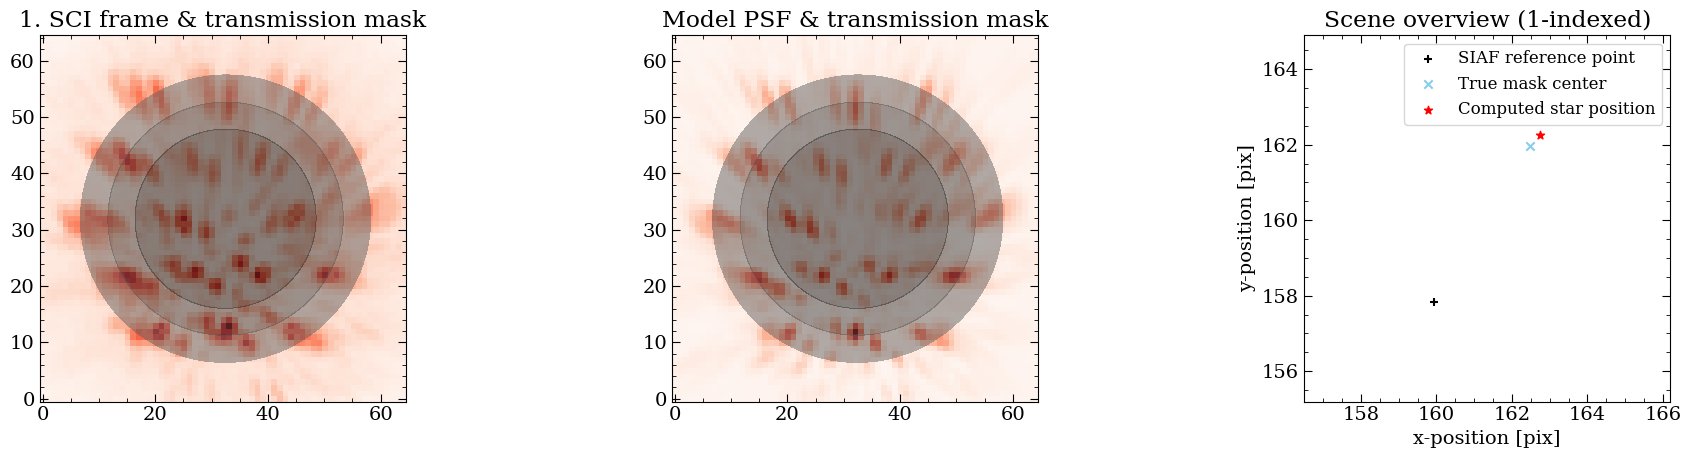

[spaceKLIP.imagetools:INFO]   --> Recenter frames: jw01179005001_03107_00001_nrca2_calints.fits
[spaceKLIP.imagetools:INFO]   --> Recenter frames: median required shift = 87.44 mas
[spaceKLIP.imagetools:INFO]   --> Recenter frames: jw01179008001_03107_00001_nrca2_calints.fits
[spaceKLIP.imagetools:INFO]   --> Recenter frames: jw01179008001_03107_00001_nrca2_calints.fits
[spaceKLIP.imagetools:INFO]   --> Recenter frames: median required shift = 87.44 mas
[spaceKLIP.imagetools:INFO]   --> Recenter frames: jw03337003001_05101_00001_nrca2_calints.fits
[spaceKLIP.imagetools:INFO]   --> Recenter frames: jw03337003001_05101_00001_nrca2_calints.fits
[spaceKLIP.imagetools:INFO]   --> Recenter frames: median required shift = 87.44 mas
[spaceKLIP.imagetools:INFO]   --> Recenter frames: jw03337003001_05101_00002_nrca2_calints.fits
[spaceKLIP.imagetools:INFO]   --> Recenter frames: jw03337003001_05101_00002_nrca2_calints.fits
[spaceKLIP.imagetools:INFO]   --> Recenter frames: median required shift 

In [23]:
imageTools.recenter_frames(spectral_type='M0V')

# The spectral type is used to make a more accurate PSF simulation for the star.
# This step changes the pixel data in the first science frame to center it.
# The other subsequent frames are shifted identically. I.e. the shift to center
# the first SCI frame is applied to all SCI and REF frames.

In [24]:
!ls data_nircam_twhya/recentered/*pdf

data_nircam_twhya/recentered/jw01179005001_03107_00001_nrca2_calints.pdf


[spaceKLIP.imagetools:INFO] --> Concatenation JWST_NIRCAM_NRCA2_F200W_MASKRND_MASK335R_SUB320A335R
[spaceKLIP.imagetools:INFO]   --> Align frames: jw01179005001_03107_00001_nrca2_calints.fits
[spaceKLIP.imagetools:INFO]   --> Align frames: median required shift = 0.25 mas
[spaceKLIP.imagetools:INFO]   --> Align frames: jw01179008001_03107_00001_nrca2_calints.fits
[spaceKLIP.imagetools:INFO]   --> Align frames: median required shift = 16.05 mas
[spaceKLIP.imagetools:INFO]   --> Align frames: jw03337003001_05101_00001_nrca2_calints.fits
[spaceKLIP.imagetools:INFO]   --> Align frames: median required shift = 6.47 mas
[spaceKLIP.imagetools:INFO]   --> Align frames: jw03337003001_05101_00002_nrca2_calints.fits
[spaceKLIP.imagetools:INFO]   --> Align frames: median required shift = 24.70 mas
[spaceKLIP.imagetools:INFO]   --> Align frames: jw03337003001_05101_00003_nrca2_calints.fits
[spaceKLIP.imagetools:INFO]   --> Align frames: median required shift = 28.41 mas
[spaceKLIP.imagetools:INFO] 

[spaceKLIP.imagetools:INFO]   --> Align frames: median required shift = 400.67 mas


[spaceKLIP.imagetools:WARNING]   --> The following frames might not be properly aligned: [0 1 2]


[spaceKLIP.imagetools:INFO]   --> Align frames: jw03947009001_03103_00002_nrca2_calints.fits
[spaceKLIP.imagetools:INFO]   --> Align frames: median required shift = 427.96 mas


[spaceKLIP.imagetools:WARNING]   --> The following frames might not be properly aligned: [0 1 2]


[spaceKLIP.imagetools:INFO]   --> Align frames: jw03947009001_03103_00003_nrca2_calints.fits
[spaceKLIP.imagetools:INFO]   --> Align frames: median required shift = 443.73 mas


[spaceKLIP.imagetools:WARNING]   --> The following frames might not be properly aligned: [0 1 2]


[spaceKLIP.imagetools:INFO]   --> Align frames: jw03947009001_03103_00004_nrca2_calints.fits
[spaceKLIP.imagetools:INFO]   --> Align frames: median required shift = 324.03 mas


[spaceKLIP.imagetools:WARNING]   --> The following frames might not be properly aligned: [0 1 2]


[spaceKLIP.imagetools:INFO]   --> Align frames: jw03947009001_03103_00005_nrca2_calints.fits
[spaceKLIP.imagetools:INFO]   --> Align frames: median required shift = 390.31 mas


[spaceKLIP.imagetools:WARNING]   --> The following frames might not be properly aligned: [0 1 2]


[spaceKLIP.imagetools:INFO]   --> Align frames: jw03947012001_04103_00001_nrca2_calints.fits
[spaceKLIP.imagetools:INFO]   --> Align frames: median required shift = 14.36 mas
[spaceKLIP.imagetools:INFO]   --> Align frames: jw03947012001_04103_00002_nrca2_calints.fits
[spaceKLIP.imagetools:INFO]   --> Align frames: median required shift = 17.01 mas
[spaceKLIP.imagetools:INFO]   --> Align frames: jw03947012001_04103_00003_nrca2_calints.fits
[spaceKLIP.imagetools:INFO]   --> Align frames: median required shift = 34.32 mas
[spaceKLIP.imagetools:INFO]   --> Align frames: jw03947012001_04103_00004_nrca2_calints.fits
[spaceKLIP.imagetools:INFO]   --> Align frames: median required shift = 32.17 mas
[spaceKLIP.imagetools:INFO]   --> Align frames: jw03947012001_04103_00005_nrca2_calints.fits
[spaceKLIP.imagetools:INFO]   --> Align frames: median required shift = 15.12 mas
[spaceKLIP.imagetools:INFO]   --> Align frames: jw03947015001_03103_00001_nrca2_calints.fits
[spaceKLIP.imagetools:INFO]   --

[spaceKLIP.imagetools:WARNING]   --> The following frames might not be properly aligned: [0 1 2 3 4 5 6 7 8 9]


[spaceKLIP.imagetools:INFO]   --> Align frames: jw06630051001_02102_00002_nrca2_calints.fits
[spaceKLIP.imagetools:INFO]   --> Align frames: median required shift = 4230.17 mas


[spaceKLIP.imagetools:WARNING]   --> The following frames might not be properly aligned: [0 1 2 3 4 5 6 7 8 9]


[spaceKLIP.imagetools:INFO]   --> Align frames: jw06630051001_02102_00003_nrca2_calints.fits
[spaceKLIP.imagetools:INFO]   --> Align frames: median required shift = 4208.03 mas


[spaceKLIP.imagetools:WARNING]   --> The following frames might not be properly aligned: [0 1 2 3 4 5 6 7 8 9]


[spaceKLIP.imagetools:INFO]   --> Align frames: jw06630051001_02102_00004_nrca2_calints.fits
[spaceKLIP.imagetools:INFO]   --> Align frames: median required shift = 4187.07 mas


[spaceKLIP.imagetools:WARNING]   --> The following frames might not be properly aligned: [0 1 2 3 4 5 6 7 8 9]


[spaceKLIP.imagetools:INFO]   --> Align frames: jw06630051001_02102_00005_nrca2_calints.fits
[spaceKLIP.imagetools:INFO]   --> Align frames: median required shift = 4209.03 mas


[spaceKLIP.imagetools:WARNING]   --> The following frames might not be properly aligned: [0 1 2 3 4 5 6 7 8 9]


[spaceKLIP.imagetools:INFO]  Plot saved in data_nircam_twhya/aligned/JWST_NIRCAM_NRCA2_F200W_MASKRND_MASK335R_SUB320A335R_align_sci.pdf


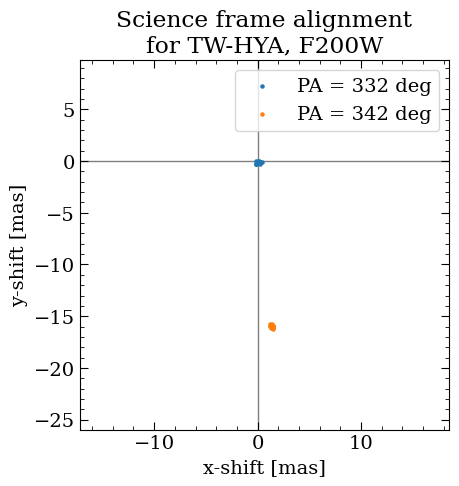

[spaceKLIP.imagetools:INFO]  Plot saved in data_nircam_twhya/aligned/JWST_NIRCAM_NRCA2_F200W_MASKRND_MASK335R_SUB320A335R_align_ref.pdf


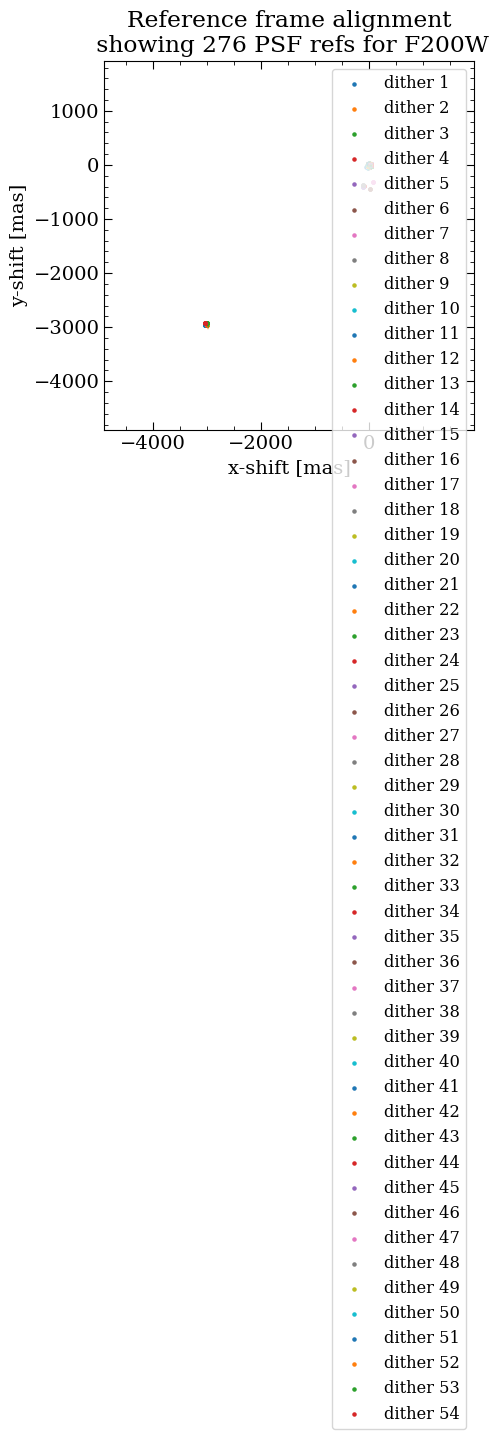

In [25]:
# Align Frames Use image registration to align all frames in a concatenation to the
# first science frame in that concatenation.
imageTools.align_frames(method='fourier',
                        kwargs={},
                        subdir='aligned')

In [26]:
# This step also outputs plots that show the results of the alignment.
!ls data_nircam_twhya/aligned/*pdf

data_nircam_twhya/aligned/JWST_NIRCAM_NRCA2_F200W_MASKRND_MASK335R_SUB320A335R_align_ref.pdf
data_nircam_twhya/aligned/JWST_NIRCAM_NRCA2_F200W_MASKRND_MASK335R_SUB320A335R_align_sci.pdf


In [27]:
# Compare how well recentering and alignment did.

spaceKLIP.plotting.display_image_comparisons(
    database,
    ['recentered', 'aligned'],  # Subdirectories to look for files in.
    restrict_to={'FILTER': filt,  # Sort by filter.
                 'TYPE': ['SCI', 'REF']  # Sort by file type SCI/REF.
    },
    subtract_first=True,  # Subtract the first science frame to check alignment.
    interactive=True,  # Static or interactive plots?
    # Define the min/max/stretch values for consistent image scaling.
    # vmin=-0.5, vmax=0.5, stretch=0.05,
    save_filename='twhya_recenter_vs_align_f200W_comparison.pdf')

IntSlider(value=1, description='Image Index:', max=277, min=1)

Output()

In [28]:
# Pad all frames.
imageTools.pad_frames(npix=80,
                      cval=np.nan,
                      types=['SCI', 'SCI_BG', 'REF', 'REF_BG'],
                      subdir='padded')

[spaceKLIP.imagetools:INFO] --> Concatenation JWST_NIRCAM_NRCA2_F200W_MASKRND_MASK335R_SUB320A335R
[spaceKLIP.imagetools:INFO]   --> Frame padding: jw01179005001_03107_00001_nrca2_calints.fits
[spaceKLIP.imagetools:INFO]   --> Frame padding: old shape = (320, 320), new shape = (480, 480), fill value = nan
[spaceKLIP.imagetools:INFO]   --> Frame padding: jw01179008001_03107_00001_nrca2_calints.fits
[spaceKLIP.imagetools:INFO]   --> Frame padding: old shape = (320, 320), new shape = (480, 480), fill value = nan
[spaceKLIP.imagetools:INFO]   --> Frame padding: jw03337003001_05101_00001_nrca2_calints.fits
[spaceKLIP.imagetools:INFO]   --> Frame padding: old shape = (320, 320), new shape = (480, 480), fill value = nan
[spaceKLIP.imagetools:INFO]   --> Frame padding: jw03337003001_05101_00002_nrca2_calints.fits
[spaceKLIP.imagetools:INFO]   --> Frame padding: old shape = (320, 320), new shape = (480, 480), fill value = nan
[spaceKLIP.imagetools:INFO]   --> Frame padding: jw03337003001_05101_

In [29]:
spaceKLIP.plotting.display_coron_dataset(
    database,
    restrict_to={'FILTER': filt,  # Sort by filter.
                 'TYPE': ['SCI']  # Sort by file type SCI/REF.
    },
    interactive=True,  # Set to False for static plots.
    zoom_center=3,  # Optional zoom factor; set to None to disable.
    bbox_color=None,  # Remove background text boxes.
    save_filename='twhya_f444w_stage2_cleaned.pdf'  # Save plots to PDF.
)

IntSlider(value=0, description='Image  Index:', max=1)

Output()

In [30]:
# Run pyKLIP pipeline. Additional parameters for klip_dataset function can
# be passed using kwargs parameter.
spaceKLIP.pyklippipeline.run_obs(database=database,
                       kwargs={'mode': ['ADI', 'RDI', 'ADI+RDI'],
                               'annuli': [1],
                               'subsections': [1],
                               'numbasis': [1, 2, 5, 10, 20, 50],
                               'algo': 'klip',
                               'save_rolls': True},
                       subdir='klipsub')

[spaceKLIP.pyklippipeline:INFO] --> Concatenation JWST_NIRCAM_NRCA2_F200W_MASKRND_MASK335R_SUB320A335R
[spaceKLIP.pyklippipeline:INFO]   --> pyKLIP: mode = ADI, annuli = 1, subsections = 1
Begin align and scale images for each wavelength
Wavelength 2.003e-06 with index 0 has finished align and scale. Queuing for KLIP
Total number of tasks for KLIP processing is 1


  0%|          | 0/1 [00:00<?, ?it/s]

Closing threadpool
Derotating Images...
Writing Images to directory /home/yuchialin/JWST/twhya/200W/data_nircam_twhya/klipsub
wavelength collapsing reduced data of shape (b, N, wv, y, x):(6, 32, 1, 480, 480)
[spaceKLIP.pyklippipeline:INFO]   --> pyKLIP: mode = RDI, annuli = 1, subsections = 1
Begin align and scale images for each wavelength
Wavelength 2.003e-06 with index 0 has finished align and scale. Queuing for KLIP
Total number of tasks for KLIP processing is 1


  0%|          | 0/1 [00:00<?, ?it/s]

Closing threadpool
Derotating Images...
Writing Images to directory /home/yuchialin/JWST/twhya/200W/data_nircam_twhya/klipsub
wavelength collapsing reduced data of shape (b, N, wv, y, x):(6, 32, 1, 480, 480)
[spaceKLIP.pyklippipeline:INFO]   --> pyKLIP: mode = ADI+RDI, annuli = 1, subsections = 1
Begin align and scale images for each wavelength
Wavelength 2.003e-06 with index 0 has finished align and scale. Queuing for KLIP
Total number of tasks for KLIP processing is 1


  0%|          | 0/1 [00:00<?, ?it/s]

Closing threadpool
Derotating Images...
Writing Images to directory /home/yuchialin/JWST/twhya/200W/data_nircam_twhya/klipsub
wavelength collapsing reduced data of shape (b, N, wv, y, x):(6, 32, 1, 480, 480)
[spaceKLIP.database:INFO] --> Identified 1 concatenation(s)
[spaceKLIP.database:INFO]   --> Concatenation 1: JWST_NIRCAM_NRCA2_F200W_MASKRND_MASK335R_SUB320A335R
 TYPE   EXP_TYPE DATAMODL TELESCOP ... SUBSECTS    KLMODES     BUNIT  BLURFWHM
------ --------- -------- -------- ... -------- -------------- ------ --------
PYKLIP NRC_CORON   STAGE3     JWST ...        1 1,2,5,10,20,50 MJy/sr      nan
PYKLIP NRC_CORON   STAGE3     JWST ...        1 1,2,5,10,20,50 MJy/sr      nan
PYKLIP NRC_CORON   STAGE3     JWST ...        1 1,2,5,10,20,50 MJy/sr      nan


In [31]:
database.summarize()

NIRCAM_F200W_MASK335R
	STAGE2: 278 files;	2 SCI, 276 REF
	STAGE3: 3 files;	3 PYKLIP


In [32]:
database = spaceKLIP.database.create_database(
                                    input_dir=os.path.join(data_root, 'klipsub'),
                                    file_type='*KLmodes-all.fits',
                                    output_dir=data_root,
                                    readlevel=3,
                                    pid=1179)

[spaceKLIP.database:INFO] --> Identified 1 concatenation(s)
[spaceKLIP.database:INFO]   --> Concatenation 1: JWST_NIRCAM_NRCA2_F200W_MASKRND_MASK335R_SUB320A335R
 TYPE   EXP_TYPE DATAMODL TELESCOP ... SUBSECTS    KLMODES     BUNIT  BLURFWHM
------ --------- -------- -------- ... -------- -------------- ------ --------
PYKLIP NRC_CORON   STAGE3     JWST ...        1 1,2,5,10,20,50 MJy/sr      nan
PYKLIP NRC_CORON   STAGE3     JWST ...        1 1,2,5,10,20,50 MJy/sr      nan
PYKLIP NRC_CORON   STAGE3     JWST ...        1 1,2,5,10,20,50 MJy/sr      nan


In [33]:
database.summarize()

NIRCAM_F200W_MASK335R
	STAGE2: 278 files;	2 SCI, 276 REF
	STAGE3: 3 files;	3 PYKLIP


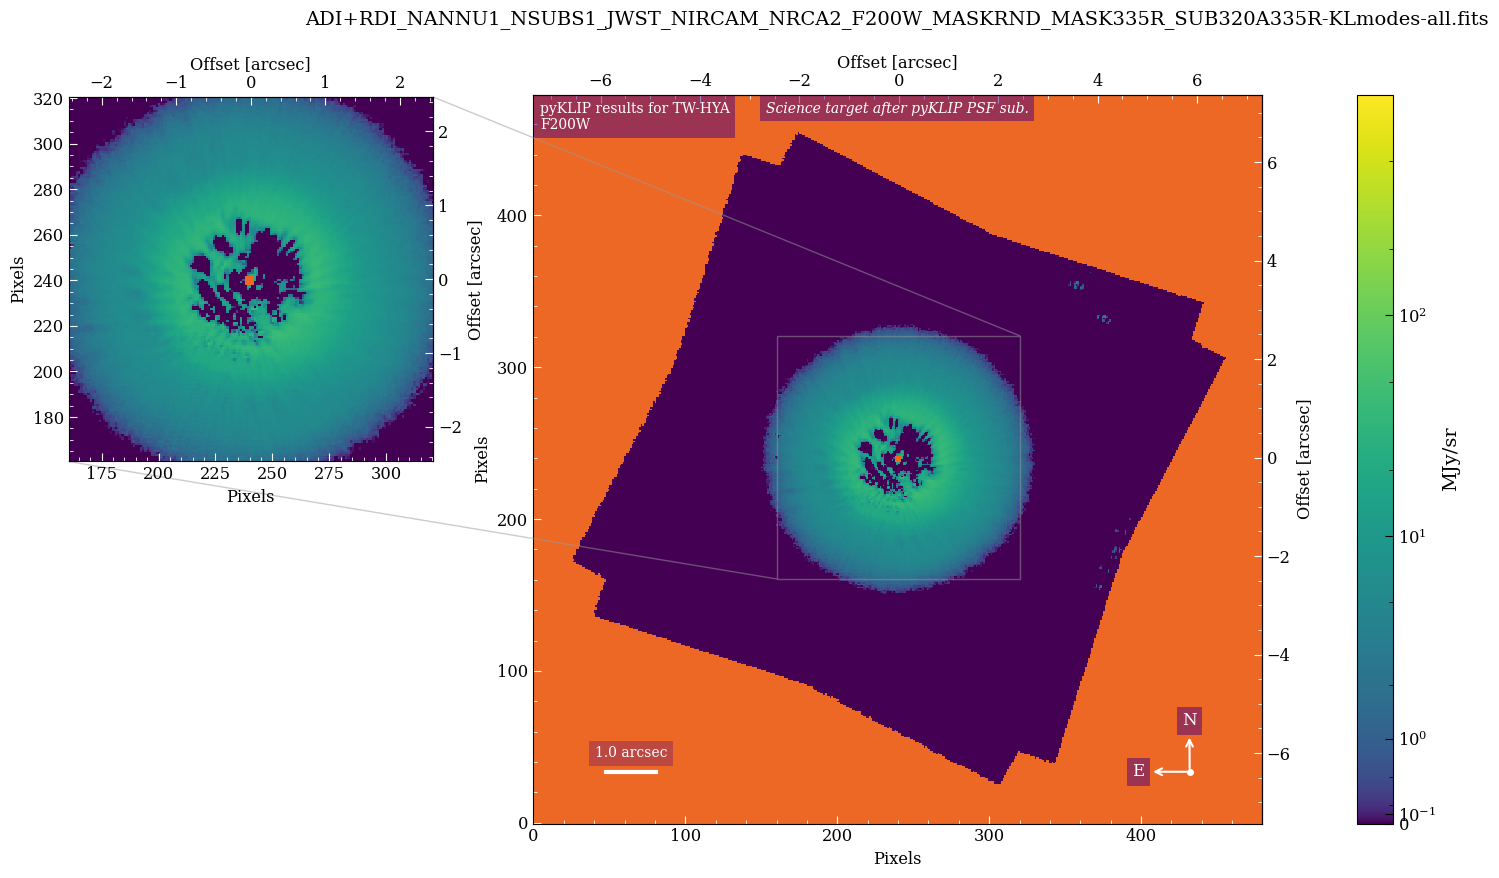

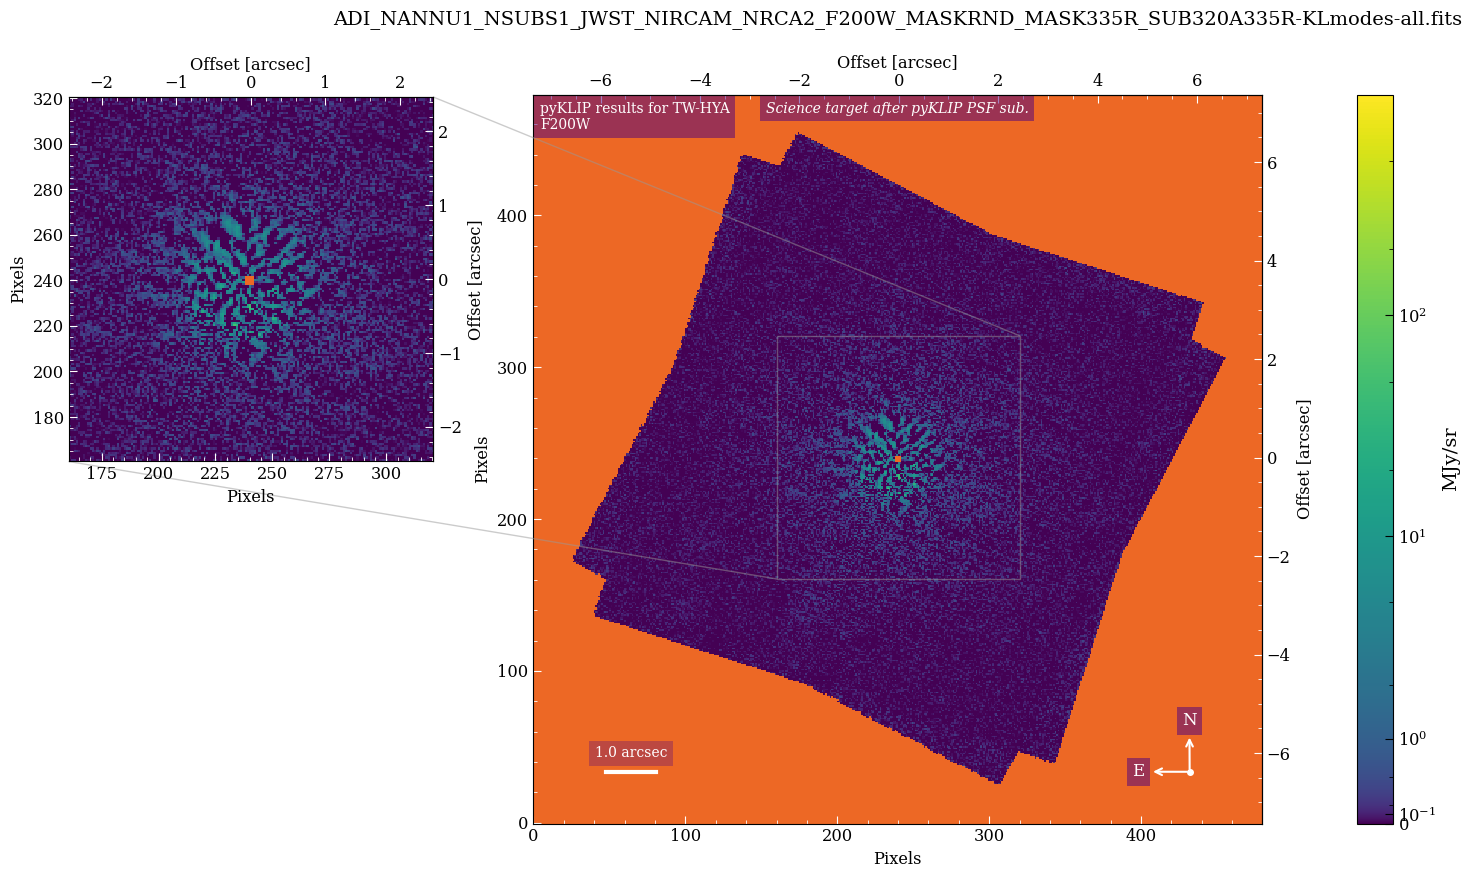

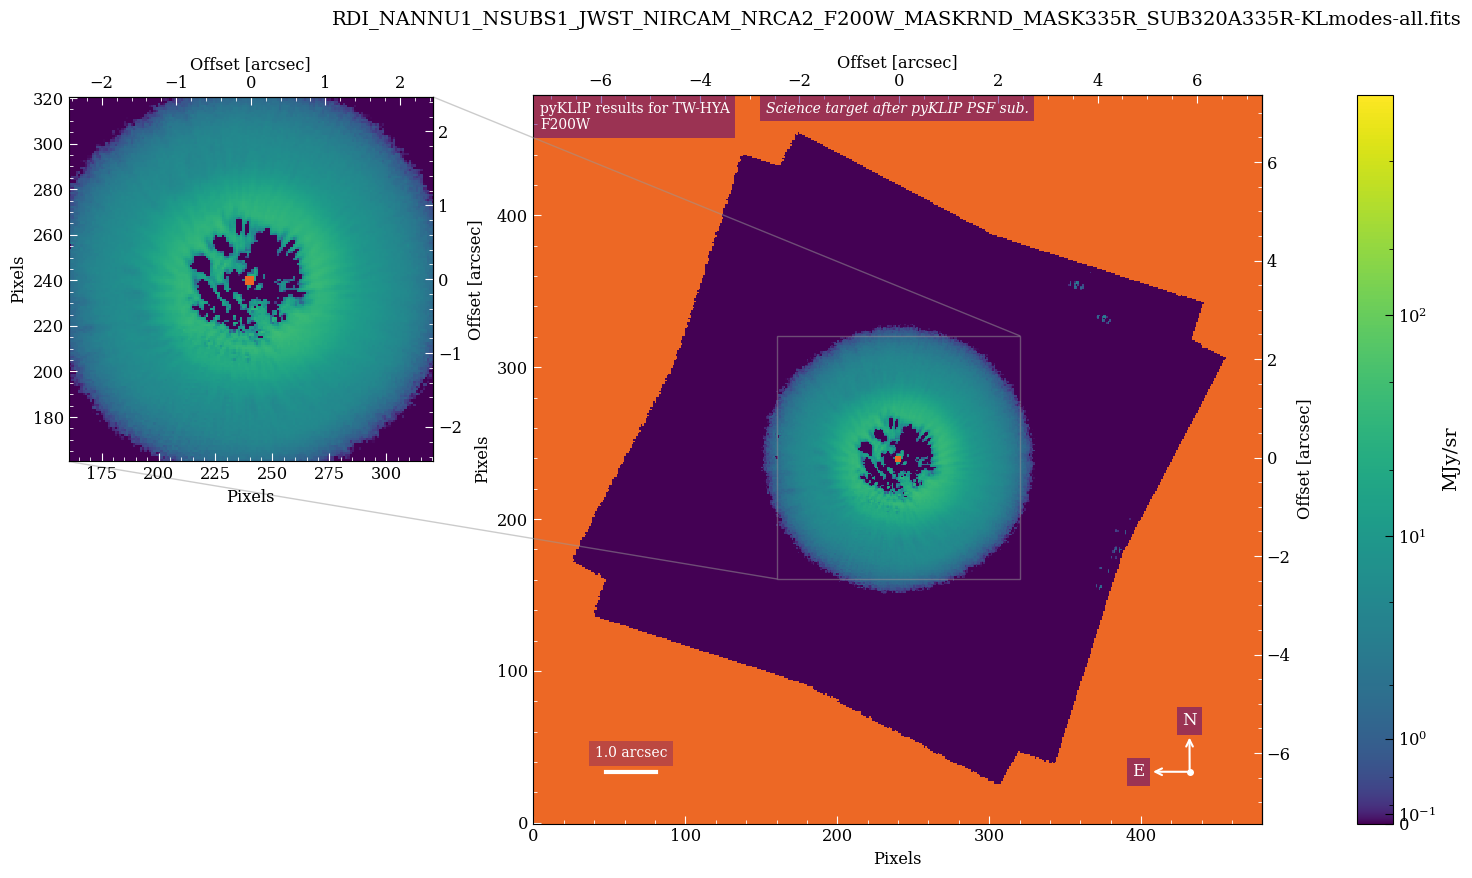

In [34]:
# show the image in PYKLIP output
spaceKLIP.plotting.display_coron_dataset(
    database,
    interactive=False,  # Static or interactive plots?
    zoom_center=3,  # Optional zoom factor; set to None to disable.
    vmin=0, vmax=1e3,  # Define the min/max values for consistent image scaling.
    save_filename='twhya_f444w_klipsub.pdf'  # Save plots to PDF.
)

# Post-Pipeline

In [1]:
import os
import glob
import numpy as np
import astropy
import astropy.table
import matplotlib.pyplot as plt
import spaceKLIP
import webbpsf_ext
webbpsf_ext.setup_logging('WARN', verbose=False)
# Name the root directory where we will keep the data for this tutorial.
data_root = 'data_nircam_twhya'
filt = 'F200W'  # Set to None to disable filter selection and load all filters.


In [5]:
# Define the directory containing the KLIP output files.
input_dir = os.path.join(data_root, 'klipsub')

# Get a sorted list of FITS files that match the filter and KLmodes pattern.
fitsfiles = sorted(glob.glob(os.path.join(input_dir, f"*{filt}*KLmodes-all.fits")))

# Initialize the SpaceKLIP database with the root data directory.
database = spaceKLIP.database.Database(output_dir=data_root)

# Read the JWST data from the FITS files into the database.
database.read_jwst_s3_data(fitsfiles)

[spaceKLIP.database:INFO] --> Identified 1 concatenation(s)
[spaceKLIP.database:INFO]   --> Concatenation 1: JWST_NIRCAM_NRCA2_F200W_MASKRND_MASK335R_SUB320A335R
 TYPE   EXP_TYPE DATAMODL TELESCOP ... SUBSECTS    KLMODES     BUNIT  BLURFWHM
------ --------- -------- -------- ... -------- -------------- ------ --------
PYKLIP NRC_CORON   STAGE3     JWST ...        1 1,2,5,10,20,50 MJy/sr      nan
PYKLIP NRC_CORON   STAGE3     JWST ...        1 1,2,5,10,20,50 MJy/sr      nan
PYKLIP NRC_CORON   STAGE3     JWST ...        1 1,2,5,10,20,50 MJy/sr      nan


In [6]:
star_photometry_vot = 'twhya.vot'  # VOTable.
star_spectral_type = 'M0V'  # Spectral type.

In [7]:
# Read in the VOTable version of the star photometry data.
vot_version = astropy.table.Table.read(star_photometry_vot)

# Convert frequency to wavelength (microns) for plotting.
vot_version["wavelength"] = (astropy.constants.c / vot_version["sed_freq"]).to(
    astropy.units.micron)

print("VOTable Version of Star Photometry Data:")
vot_version.to_pandas()  # For an easier to read output.

VOTable Version of Star Photometry Data:


,_RAJ2000,_DEJ2000,_tabname,_ID,sed_freq,sed_flux,sed_eflux,sed_filter,wavelength
0,165.466277,-34.704728,I/239/hip_main,recno=53870,541430.0,0.1560,NaN,Johnson:V,0.553705
1,165.466277,-34.704728,I/239/hip_main,recno=53870,563630.0,0.1300,0.0140,HIP:VT,0.531896
2,165.466277,-34.704728,I/239/hip_main,recno=53870,713280.0,0.0656,0.0079,HIP:BT,0.420301
3,165.466277,-34.704728,I/239/hip_main,recno=53870,745750.0,0.1400,0.0050,HIP:Hp,0.402001
4,165.466341,-34.704643,I/239/tyc_main,recno=749379,541430.0,0.1350,NaN,Johnson:V,0.553705
...,...,...,...,...,...,...,...,...,...
453,165.466272,-34.704731,J/MNRAS/491/215/table1,recno=73,445460.0,0.2010,NaN,Gaia:G,0.672995
454,165.466292,-34.704722,J/MNRAS/494/2429/table1,recno=75,138550.0,0.8140,0.0180,2MASS:Ks,2.163785
455,165.466292,-34.704722,J/MNRAS/494/2429/table1,recno=75,445460.0,0.2010,0.0010,Gaia:G,0.672995
456,165.465903,-34.704793,J/MNRAS/529/1802/targets,recno=719177,445460.0,0.1990,NaN,Gaia:G,0.672995


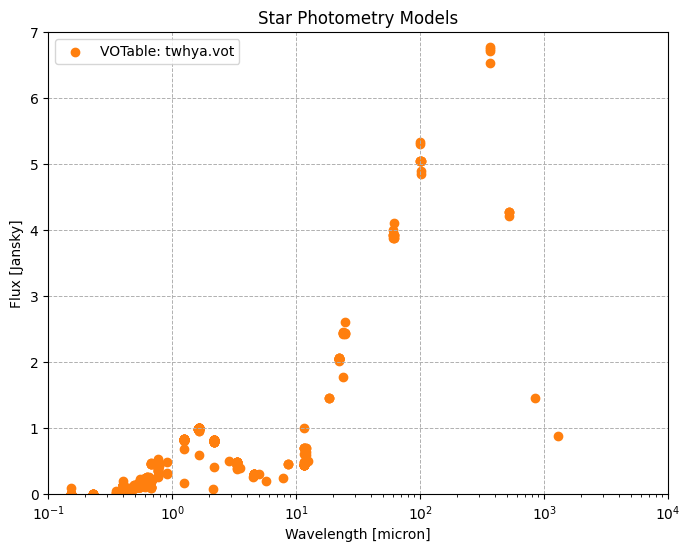

In [9]:
plt.figure(figsize=(8, 6))
plt.scatter(
    vot_version["wavelength"],
    vot_version["sed_flux"],
    label="VOTable: twhya.vot",
    color="C1",
)

plt.xlabel("Wavelength [micron]")
plt.ylabel("Flux [Jansky]")
plt.legend(fontsize=10)

plt.xscale("log")
plt.xlim(0.1, 10**4)
plt.ylim(0, 7)
plt.grid(True, linestyle="--", linewidth=0.7)
plt.title("Star Photometry Models")

plt.show()

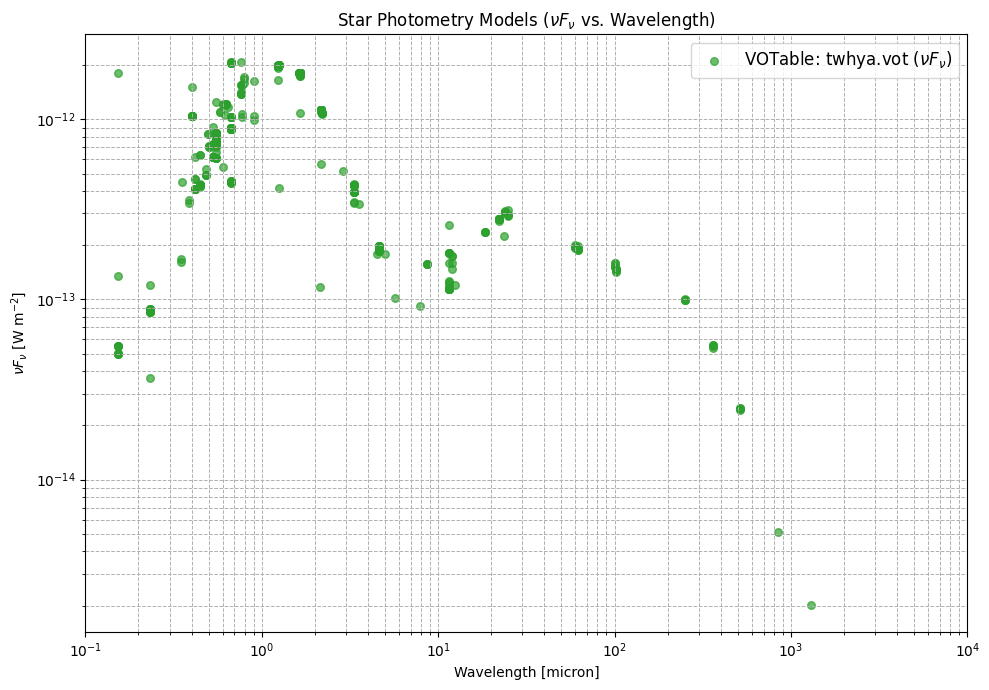

In [12]:
import matplotlib.pyplot as plt
import numpy as np
# Constants

c = 299792458.0  # Speed of light in m/s
Jy_to_Wm2Hz = 1e-26  # Conversion factor for Jansky to W/m^-2/Hz^-1
micron_to_m = 1e-6   # Conversion factor for micron to m

# Extract data from your vot_version
wavelength_microns = vot_version["wavelength"]
sed_flux_jansky = vot_version["sed_flux"]

# 1. Convert wavelength from microns to meters
wavelength_m = wavelength_microns * micron_to_m

# 2. Calculate frequency (nu) in Hz
frequency_hz = c / wavelength_m # Simpler, assuming valid wavelengths

# 3. Convert flux density F_nu from Jansky to W/m^2/Hz
sed_flux_Wm2Hz = sed_flux_jansky * Jy_to_Wm2Hz

# 4. Calculate nu * F_nu in W/m^2
nu_F_nu_Wm2 = frequency_hz * sed_flux_Wm2Hz

# --- Plotting ---
plt.figure(figsize=(10, 7)) # Slightly larger for better readability
plt.scatter(
    wavelength_microns, # X-axis remains wavelength in microns
    nu_F_nu_Wm2,
    label=r"VOTable: twhya.vot ($\nu F_{\nu}$)", # Use LaTeX for nu F_nu
    color="C2", # Changed color for distinction if you plot both
    s=30,       # Marker size
    alpha=0.7   # Marker transparency
)

plt.xlabel("Wavelength [micron]")
plt.ylabel(r"$\nu F_{\nu}$ [W m$^{-2}$]") # LaTeX for units
plt.legend(fontsize=12)

plt.xscale("log")
plt.yscale("log")

plt.xlim(0.1, 10**4)
plt.grid(True, linestyle="--", linewidth=0.7, which="both") # 'which="both"' is good for log scales
plt.title(r"Star Photometry Models ($\nu F_{\nu}$ vs. Wavelength)")

plt.tight_layout() # Adjusts plot to prevent labels from overlapping
plt.show()

In [13]:
# Initialize the spaceKLIP contrast estimation class.
analysistools = spaceKLIP.analysistools.AnalysisTools(database)

[spaceKLIP.analysistools:INFO] Copying starfile twhya.vot to data_nircam_twhya/rawcon/twhya.vot
[spaceKLIP.analysistools:INFO] --> Concatenation JWST_NIRCAM_NRCA2_F200W_MASKRND_MASK335R_SUB320A335R
[spaceKLIP.analysistools:INFO] Analyzing file data_nircam_twhya/klipsub/ADI+RDI_NANNU1_NSUBS1_JWST_NIRCAM_NRCA2_F200W_MASKRND_MASK335R_SUB320A335R-KLmodes-all.fits
[spaceKLIP.psf:INFO]   --> Generating WebbPSF model
[spaceKLIP.analysistools:INFO]   Measuring raw contrast in annuli
[spaceKLIP.analysistools:INFO]   Measuring raw contrast for masked data
[spaceKLIP.analysistools:INFO]  Plot saved in data_nircam_twhya/rawcon/ADI+RDI_NANNU1_NSUBS1_JWST_NIRCAM_NRCA2_F200W_MASKRND_MASK335R_SUB320A335R-KLmodes-all_masked.pdf


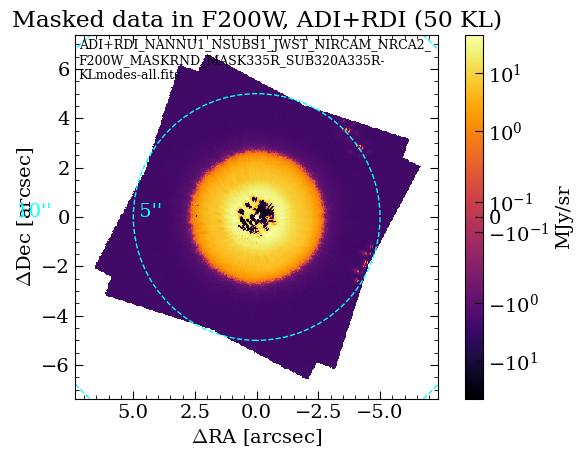

[spaceKLIP.analysistools:INFO]  Plot saved in data_nircam_twhya/rawcon/ADI+RDI_NANNU1_NSUBS1_JWST_NIRCAM_NRCA2_F200W_MASKRND_MASK335R_SUB320A335R-KLmodes-all_rawcon.pdf


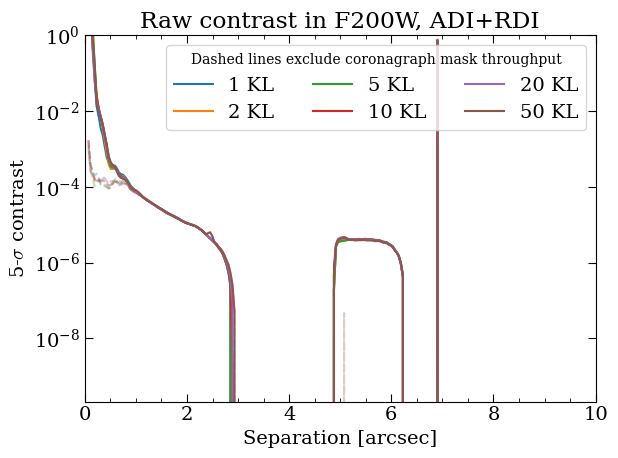

Contrast results and plots saved to data_nircam_twhya/rawcon/ADI+RDI_NANNU1_NSUBS1_JWST_NIRCAM_NRCA2_F200W_MASKRND_MASK335R_SUB320A335R-KLmodes-all_seps.npy, data_nircam_twhya/rawcon/ADI+RDI_NANNU1_NSUBS1_JWST_NIRCAM_NRCA2_F200W_MASKRND_MASK335R_SUB320A335R-KLmodes-all_cons.npy
[spaceKLIP.analysistools:INFO] Analyzing file data_nircam_twhya/klipsub/ADI_NANNU1_NSUBS1_JWST_NIRCAM_NRCA2_F200W_MASKRND_MASK335R_SUB320A335R-KLmodes-all.fits
[spaceKLIP.psf:INFO]   --> Generating WebbPSF model
[spaceKLIP.analysistools:INFO]   Measuring raw contrast in annuli
[spaceKLIP.analysistools:INFO]   Measuring raw contrast for masked data
[spaceKLIP.analysistools:INFO]  Plot saved in data_nircam_twhya/rawcon/ADI_NANNU1_NSUBS1_JWST_NIRCAM_NRCA2_F200W_MASKRND_MASK335R_SUB320A335R-KLmodes-all_masked.pdf


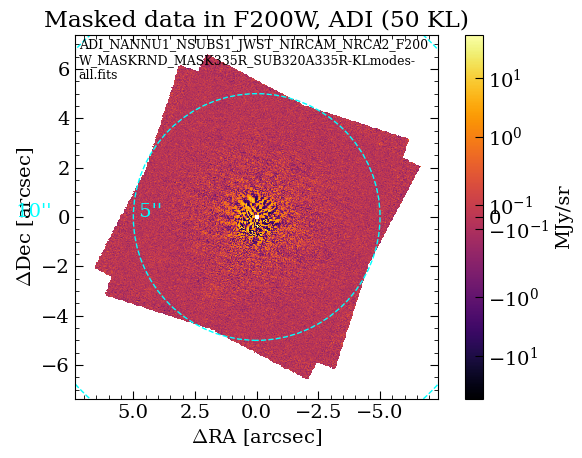

[spaceKLIP.analysistools:INFO]  Plot saved in data_nircam_twhya/rawcon/ADI_NANNU1_NSUBS1_JWST_NIRCAM_NRCA2_F200W_MASKRND_MASK335R_SUB320A335R-KLmodes-all_rawcon.pdf


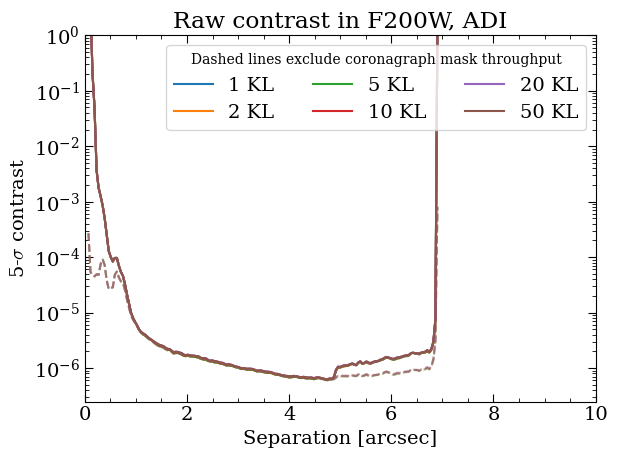

Contrast results and plots saved to data_nircam_twhya/rawcon/ADI_NANNU1_NSUBS1_JWST_NIRCAM_NRCA2_F200W_MASKRND_MASK335R_SUB320A335R-KLmodes-all_seps.npy, data_nircam_twhya/rawcon/ADI_NANNU1_NSUBS1_JWST_NIRCAM_NRCA2_F200W_MASKRND_MASK335R_SUB320A335R-KLmodes-all_cons.npy
[spaceKLIP.analysistools:INFO] Analyzing file data_nircam_twhya/klipsub/RDI_NANNU1_NSUBS1_JWST_NIRCAM_NRCA2_F200W_MASKRND_MASK335R_SUB320A335R-KLmodes-all.fits
[spaceKLIP.psf:INFO]   --> Generating WebbPSF model
[spaceKLIP.analysistools:INFO]   Measuring raw contrast in annuli
[spaceKLIP.analysistools:INFO]   Measuring raw contrast for masked data
[spaceKLIP.analysistools:INFO]  Plot saved in data_nircam_twhya/rawcon/RDI_NANNU1_NSUBS1_JWST_NIRCAM_NRCA2_F200W_MASKRND_MASK335R_SUB320A335R-KLmodes-all_masked.pdf


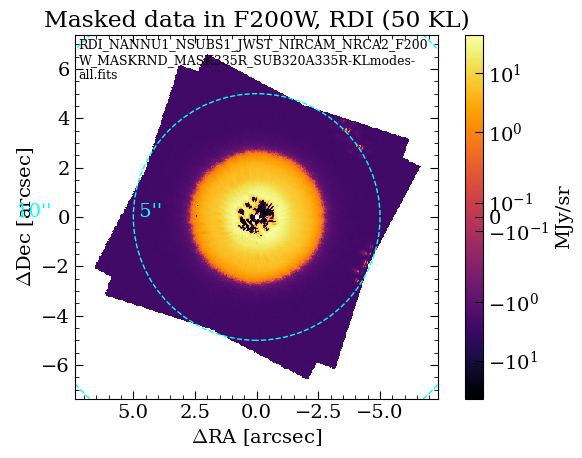

[spaceKLIP.analysistools:INFO]  Plot saved in data_nircam_twhya/rawcon/RDI_NANNU1_NSUBS1_JWST_NIRCAM_NRCA2_F200W_MASKRND_MASK335R_SUB320A335R-KLmodes-all_rawcon.pdf


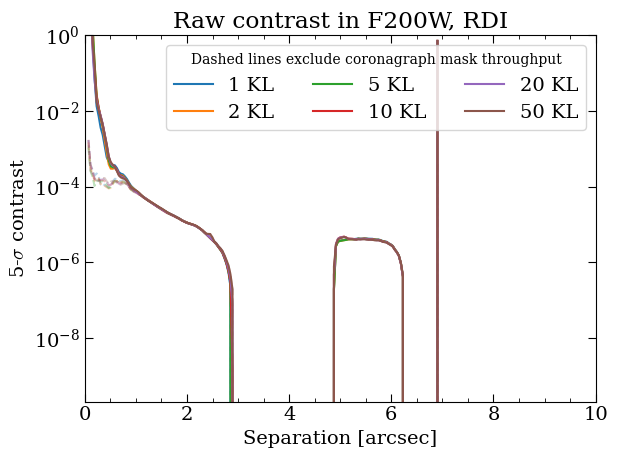

Contrast results and plots saved to data_nircam_twhya/rawcon/RDI_NANNU1_NSUBS1_JWST_NIRCAM_NRCA2_F200W_MASKRND_MASK335R_SUB320A335R-KLmodes-all_seps.npy, data_nircam_twhya/rawcon/RDI_NANNU1_NSUBS1_JWST_NIRCAM_NRCA2_F200W_MASKRND_MASK335R_SUB320A335R-KLmodes-all_cons.npy


In [14]:
# Compute raw contrast.
analysistools.raw_contrast(
    star_photometry_vot,  # Stellar photometry.
    spectral_type=star_spectral_type,  # Spectral type.
    # [RA offset (arcsec), Dec offset (arcsec), mask radius (lambda/D)].
    subdir='rawcon')

In [2]:
from astropy.io import fits
# print out the header of data_nircam_twhya/klipsub/ADI_NANNU1_NSUBS1_JWST_NIRCAM_NRCA2_F200W_MASKRND_MASK335R_SUB320A335R-KLmodes-all.fits
# Define the path to the FITS file
fits_file = 'data_nircam_twhya/klipsub/ADI_NANNU1_NSUBS1_JWST_NIRCAM_NRCA2_F200W_MASKRND_MASK335R_SUB320A335R-KLmodes-all.fits'
# Open the FITS file
with fits.open(fits_file) as hdul:
    # print the data structure of the FITS file
    print("FITS file structure:")
    hdul.info()
    # Print the header of the first HDU
    for i in hdul[0].header:
        print(f"{i}: {hdul[0].header[i]}")


FITS file structure:
Filename: data_nircam_twhya/klipsub/ADI_NANNU1_NSUBS1_JWST_NIRCAM_NRCA2_F200W_MASKRND_MASK335R_SUB320A335R-KLmodes-all.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      95   (480, 480, 6)   float32   
SIMPLE: True
BITPIX: -32
NAXIS: 3
NAXIS1: 480
NAXIS2: 480
NAXIS3: 6
EXTEND: True
DRPNFILE: 32
FILE_0: jw01179005001_03107_00001_nrca2_calints.fits_INT1.fits
FILE_1: jw01179005001_03107_00001_nrca2_calints.fits_INT10.fits
FILE_2: jw01179005001_03107_00001_nrca2_calints.fits_INT11.fits
FILE_3: jw01179005001_03107_00001_nrca2_calints.fits_INT12.fits
FILE_4: jw01179005001_03107_00001_nrca2_calints.fits_INT13.fits
FILE_5: jw01179005001_03107_00001_nrca2_calints.fits_INT14.fits
FILE_6: jw01179005001_03107_00001_nrca2_calints.fits_INT15.fits
FILE_7: jw01179005001_03107_00001_nrca2_calints.fits_INT16.fits
FILE_8: jw01179005001_03107_00001_nrca2_calints.fits_INT2.fits
FILE_9: jw01179005001_03107_00001_nrca2_calints.fits_INT

/tmp/ipykernel_2240650/4206001123.py:83: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend() # Add legend to display circle label


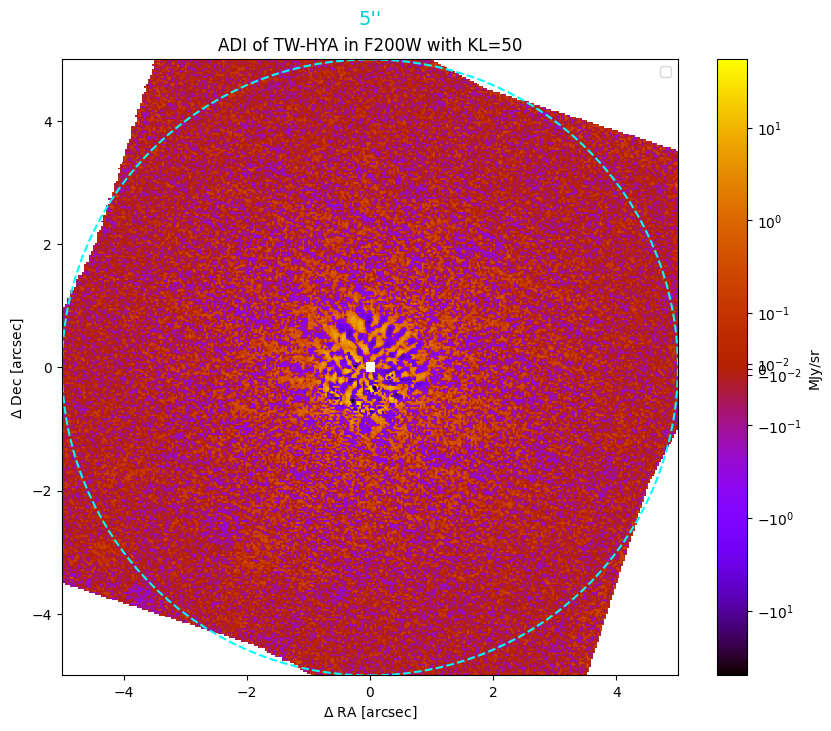

In [3]:
# Plot saved in data_nircam_twhya/klipsub/ADI_NANNU1_NSUBS1_JWST_NIRCAM_NRCA2_F200W_MASKRND_MASK335R_SUB320A335R-KLmodes-all.fits
import matplotlib.pyplot as plt
from astropy.io import fits
import os
import numpy as np
import matplotlib.patches as patches # Added for the circle
from matplotlib.colors import SymLogNorm # Import SymLogNorm

# --- Zoom Configuration ---
# Set to a list like [-2, 2] to zoom, or None to disable zoom for that axis.
zoom_x_arcsec = [-5, 5]  # Example: [-5, 5]
zoom_y_arcsec = [-5, 5]  # Example: [-5, 5]
# --- End Zoom Configuration ---

# Define the path to the FITS file
fits_file = 'data_nircam_twhya/klipsub/ADI_NANNU1_NSUBS1_JWST_NIRCAM_NRCA2_F200W_MASKRND_MASK335R_SUB320A335R-KLmodes-all.fits'
# Open the FITS file
with fits.open(fits_file) as hdul:
    # Load the data from the primary HDU
    data_cube = hdul[0].data
    header = hdul[0].header

    # Determine which slice to plot (user was plotting data[1], which is index 1)
    slice_index_to_plot = 5
    image_data_to_plot = data_cube[slice_index_to_plot]

    # Get necessary info from header for title and axes
    pixscale = header.get('PIXSCALE')  # arcsec/pixel
    filter_name = header.get('FILTER', 'N/A')
    reduction_mode = header.get('MODE', 'N/A')
    target_name = header.get('TARGPROP', 'N/A')
    # KL modes are stored as KLMODEn. data_cube[0] is KLMODE0, data_cube[1] is KLMODE1, etc.
    kl_mode_key = f'KLMODE{slice_index_to_plot}'
    # Use the value from the header (e.g., KLMODE1: 2 means KL=2)
    kl_mode_value = header.get(kl_mode_key, f'Slice {slice_index_to_plot+1}') 
    bunit = header.get('BUNIT', 'Pixel Value')

    # Image dimensions for the selected slice
    ny, nx = image_data_to_plot.shape

    # Center of the image in pixels (0-indexed from PSFCENTX/Y or calculated if not present)
    center_x_pix = header.get('PSFCENTX', (nx - 1) / 2.0)
    center_y_pix = header.get('PSFCENTY', (ny - 1) / 2.0)
    
    plt.figure(figsize=(10, 8))
    ax = plt.gca()

    # Determine a suitable linear threshold for SymLogNorm
    linthresh = np.percentile(np.abs(image_data_to_plot[np.isfinite(image_data_to_plot) & (image_data_to_plot != 0)]), 50)
    if linthresh == 0: # Handle cases where percentile might be zero (e.g. mostly zero image)
        linthresh = 1e-5 # A small default positive value
    #linthresh = 0.03
    
    # Determine vmin and vmax for SymLogNorm to cover the data range
    data_min = np.nanmin(image_data_to_plot)
    data_max = np.nanmax(image_data_to_plot)
    #data_min = -10
    #data_max = 10

    if pixscale is not None:
        x_min_arcsec = (-0.5 - center_x_pix) * pixscale
        x_max_arcsec = (nx - 0.5 - center_x_pix) * pixscale
        y_min_arcsec = (-0.5 - center_y_pix) * pixscale # bottom for origin='lower'
        y_max_arcsec = (ny - 0.5 - center_y_pix) * pixscale # top for origin='lower'
        extent_arcsec = [x_min_arcsec, x_max_arcsec, y_min_arcsec, y_max_arcsec]

        plt.imshow(image_data_to_plot, cmap='gnuplot', origin='lower', extent=extent_arcsec, 
                   norm=SymLogNorm(linthresh=linthresh, linscale=0.5, vmin=data_min, vmax=data_max, base=10))
        plt.colorbar(label=bunit)
        
        title_str = f'{reduction_mode} of {target_name} in {filter_name} with KL={kl_mode_value}'
        plt.title(title_str)
        plt.xlabel(r'$\Delta$ RA [arcsec]')
        plt.ylabel(r'$\Delta$ Dec [arcsec]')

        reference_circle_radius = 5  # arcsec
        circle = patches.Circle((0, 0), reference_circle_radius, edgecolor='aqua', facecolor='none', linestyle='--', linewidth=1.5)
        ax.add_patch(circle)
        # add a text label for the circle
        circle_label = f'{reference_circle_radius}\'\''
        ax.text(0, reference_circle_radius + 0.5, circle_label, color='darkturquoise', fontsize=14, ha='center', va='bottom')
        ax.set_aspect('equal', adjustable='box')
        plt.legend() # Add legend to display circle label

        # Apply zoom if specified
        if zoom_x_arcsec is not None:
            ax.set_xlim(zoom_x_arcsec)
        if zoom_y_arcsec is not None:
            ax.set_ylim(zoom_y_arcsec)
    else:
        # Fallback to pixel units if pixscale is not available
        print("Warning: PIXSCALE not found in FITS header. Plotting in pixel units.")
        plt.imshow(image_data_to_plot, cmap='gnuplot', origin='lower',
                   norm=SymLogNorm(linthresh=linthresh, linscale=0.5, vmin=data_min, vmax=data_max, base=10))
        plt.colorbar(label=bunit) 
        title_str = f'{filter_name} - {reduction_mode} - KL={kl_mode_value} (Pixel Units)'
        plt.title(title_str)
        plt.xlabel('X Pixel')
        plt.ylabel('Y Pixel')
        # Note: Zoom in arcseconds is not applicable here as pixscale is missing.

    plt.show()


In [ ]:
#Compute calibrated contrast.
analysistools.calibrate_contrast(
    rawcon_subdir='rawcon', # Directory raw contrasts are saved to.
    # [RA offset (arcsec), Dec offset (arcsec), mask radius (lambda/D)].
    injection_seps=[1, 2, 3], # arcsec
    injection_pas=[45, 90],  # degrees
    injection_flux_sigma=20,
    # Spacing between injected companion, None = 1 companion per injection+recovery.
    multi_injection_spacing=None,
    use_saved=False,  # Useful for debugging / changing plots / sharing files.
    subdir='calcon')  # Save directory.

[spaceKLIP.analysistools:INFO] --> Concatenation JWST_NIRCAM_NRCA2_F200W_MASKRND_MASK335R_SUB320A335R
[spaceKLIP.psf:INFO]   --> Generating WebbPSF model
[spaceKLIP.analysistools:INFO] Analyzing file data_nircam_twhya/klipsub/ADI+RDI_NANNU1_NSUBS1_JWST_NIRCAM_NRCA2_F200W_MASKRND_MASK335R_SUB320A335R-KLmodes-all.fits
[spaceKLIP.analysistools:INFO] Injecting and recovering synthetic companions. This may take a while...
[spaceKLIP.analysistools:INFO] --> All 6 source positions suitable for injection.


  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[spaceKLIP.analysistools:INFO] Analyzing file data_nircam_twhya/klipsub/ADI_NANNU1_NSUBS1_JWST_NIRCAM_NRCA2_F200W_MASKRND_MASK335R_SUB320A335R-KLmodes-all.fits
[spaceKLIP.analysistools:INFO] Injecting and recovering synthetic companions. This may take a while...
[spaceKLIP.analysistools:INFO] --> All 6 source positions suitable for injection.


  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[spaceKLIP.analysistools:INFO] Analyzing file data_nircam_twhya/klipsub/RDI_NANNU1_NSUBS1_JWST_NIRCAM_NRCA2_F200W_MASKRND_MASK335R_SUB320A335R-KLmodes-all.fits
[spaceKLIP.analysistools:INFO] Injecting and recovering synthetic companions. This may take a while...
[spaceKLIP.analysistools:INFO] --> All 6 source positions suitable for injection.


  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os

# --- User-defined variables ---
# Adjust this path to your specific output directory structure
base_output_dir = 'data_nircam_twhya/klipsub/calcon/'
# This should match the filename stem of your KLIP-subtracted FITS file
file_stem = 'RDI_NANNU1_NSUBS1_JWST_NIRCAM_NRCA2_F200W_MASKRND_MASK335R_SUB320A335R-KLmodes-all'
# Filter name, useful for titles or legends if you process multiple filters
filter_name = 'F200W'
# KL modes used in the reduction (e.g., if the 6 slices correspond to [1, 2, 5, 10, 20, 50])
# If you don't know the exact KL modes, you can just use indices 0 to 5.
kl_modes_labels = ['KL=1', 'KL=2', 'KL=3', 'KL=4', 'KL=5', 'KL=6'] # Or actual KL mode numbers

# --- Construct file paths ---
seps_file = os.path.join(base_output_dir, f'{file_stem}_cal_seps.npy')
cons_file = os.path.join(base_output_dir, f'{file_stem}_cal_cons.npy')
# Optional: if _cal_maskcons.npy exists and you want to plot it
maskcons_file = os.path.join(base_output_dir, f'{file_stem}_cal_maskcons.npy')

# --- Load the data ---
try:
    seps_data = np.load(seps_file)
    cons_data = np.load(cons_file)
    print(f"Separations data shape: {seps_data.shape}")
    print(f"Contrast data shape: {cons_data.shape}")

    # Load optional maskcons data
    maskcons_data = None
    if os.path.exists(maskcons_file):
        maskcons_data = np.load(maskcons_file)
        print(f"Masked contrast data shape: {maskcons_data.shape}")

except FileNotFoundError as e:
    print(f"Error: Could not find one or more .npy files: {e}")
    print("Please ensure the base_output_dir and file_stem are correct,")
    print("and that 'analysistools.calibrate_contrast' has completed successfully.")
    exit()

# --- Plotting ---
plt.figure(figsize=(10, 7))

# The FITS header indicates 6 KL mode slices.
# cons_data and seps_data might be 2D (kl_modes, separations)
# or seps_data could be 1D if separations are the same for all KL modes.

num_kl_modes = cons_data.shape[0]

for i in range(num_kl_modes):
    current_seps = seps_data[i] if seps_data.ndim > 1 else seps_data
    current_cons = cons_data[i]
    label = kl_modes_labels[i] if i < len(kl_modes_labels) else f'KL slice {i+1}'

    plt.semilogy(current_seps, current_cons, label=f'Calibrated Contrast ({label})')

    # Optional: Plot maskcons if available
    if maskcons_data is not None and maskcons_data.shape[0] == num_kl_modes:
        current_maskcons = maskcons_data[i]
        plt.semilogy(current_seps, current_maskcons, '--', label=f'Cal. Masked Contrast ({label})')

plt.xlabel("Separation [arcsec]")
plt.ylabel("5-σ Contrast") # Confirm if it's 5-sigma from spaceKLIP docs/outputs
plt.title(f"Calibrated Contrast for {file_stem} ({filter_name})")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
# plt.xlim(0, desired_max_separation) # Optional: set x-axis limits
# plt.ylim(1e-7, 1e-2) # Optional: set y-axis limits, adjust as needed
plt.show()

Error: Could not find one or more .npy files: [Errno 2] No such file or directory: 'data_nircam_twhya/klipsub/calcon/RDI_NANNU1_NSUBS1_JWST_NIRCAM_NRCA2_F200W_MASKRND_MASK335R_SUB320A335R-KLmodes-all_cal_seps.npy'
Please ensure the base_output_dir and file_stem are correct,
and that 'analysistools.calibrate_contrast' has completed successfully.


NameError: name 'cons_data' is not defined

<Figure size 1000x700 with 0 Axes>

: 